In [65]:
# WIP

In [2]:
# Standard imports
import pandas as pd
import numpy as np
from zipfile import ZipFile

# Plotting 
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
from bokeh.plotting import figure, output_notebook, show, output_file
import seaborn as sns

from bokeh.models import (
    GMapPlot, GMapOptions, ColumnDataSource, Circle, DataRange1d, PanTool, 
    WheelZoomTool, BoxSelectTool
)

output_notebook()
%matplotlib inline

# Housekeeping
pd.options.mode.chained_assignment = None
pd.options.display.max_columns = 999
pd.set_option('display.float_format', lambda x: '{:,.2f}'.format(x))

# Colour management
MC = '#242a49'  # Main colour
# SC = 'red'  # Secondary colour
SC = '#ededed'

colors = [MC, '#17b5ff', 'navy', 'red', 'pink']

plt.rcParams.update({
    'font.family': 'monospace',
    'font.size': 10,
    'figure.figsize': (12, 6),
    'grid.color': SC,
    'axes.titlesize': 16.0,
    'axes.facecolor': 'none',
})


Loading BokehJS ...

In [3]:
df = pd.read_csv(ZipFile('data/college-salaries.zip').open('degrees-that-pay-back.csv'))
df.head(3)

,Undergraduate Major,Starting Median Salary,Mid-Career Median Salary,Percent change from Starting to Mid-Career Salary,Mid-Career 10th Percentile Salary,Mid-Career 25th Percentile Salary,Mid-Career 75th Percentile Salary,Mid-Career 90th Percentile Salary
0,Accounting,"$46,000.00","$77,100.00",67.60,"$42,200.00","$56,100.00","$108,000.00","$152,000.00"
1,Aerospace Engineering,"$57,700.00","$101,000.00",75.00,"$64,300.00","$82,100.00","$127,000.00","$161,000.00"
2,Agriculture,"$42,600.00","$71,900.00",68.80,"$36,300.00","$52,100.00","$96,300.00","$150,000.00"


In [4]:
df = pd.read_csv(ZipFile('data/college-salaries.zip').open('degrees-that-pay-back.csv'))

# Using columns' names easiert to work with. 
# 50 - median, 10 - 10th percentile. Bgn - starting Salary. Mid - Mid-carreer.
# Camel Case notation.
df.columns = ['Major','Bgn50','Mid50','DeltaBgnMid','Mid10','Mid25','Mid75','Mid90']

mid_cols = ['Mid10', 'Mid25', 'Mid50', 'Mid75', 'Mid90']
major = 'Major'

df.set_index('Major', inplace=True)
df.sort_values('Bgn50', inplace=True)

# Changing dolar values into floats
def to_float(x):
    try:
        x_str = x.replace('$', '').replace(',', '.')[:-3].replace('.','')
        return float(x_str)
    except:
        return x
for col in df.drop('DeltaBgnMid', axis=1).columns:
    df[col] = df[col].apply(to_float)

df.head(2)

,Bgn50,Mid50,DeltaBgnMid,Mid10,Mid25,Mid75,Mid90
Major,,,,,,,
Spanish,"34,000.00","53,100.00",56.20,"31,000.00","40,000.00","76,800.00","96,400.00"
Religion,"34,100.00","52,000.00",52.50,"29,700.00","36,500.00","70,900.00","96,400.00"


In [5]:
df.shape

(50, 7)

In [6]:
df.columns

Index(['Bgn50', 'Mid50', 'DeltaBgnMid', 'Mid10', 'Mid25', 'Mid75', 'Mid90'], dtype='object')

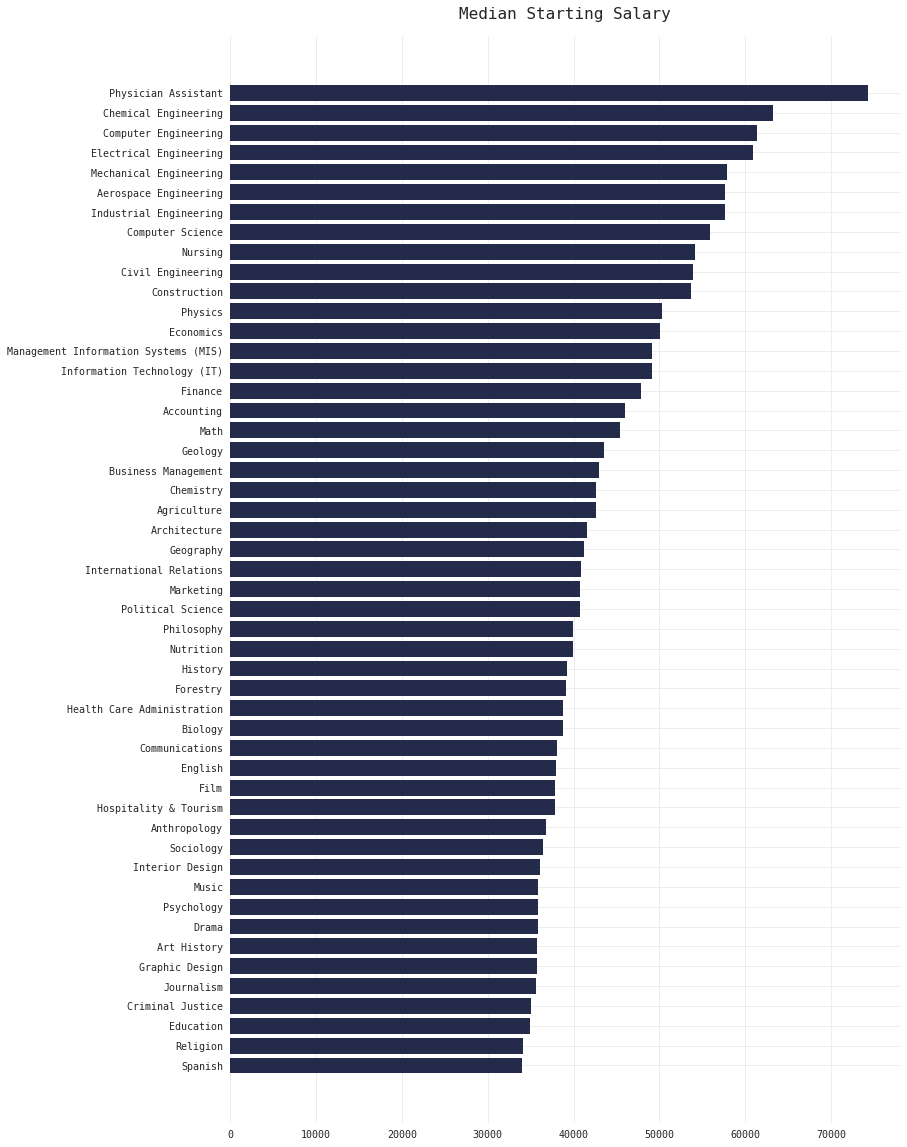

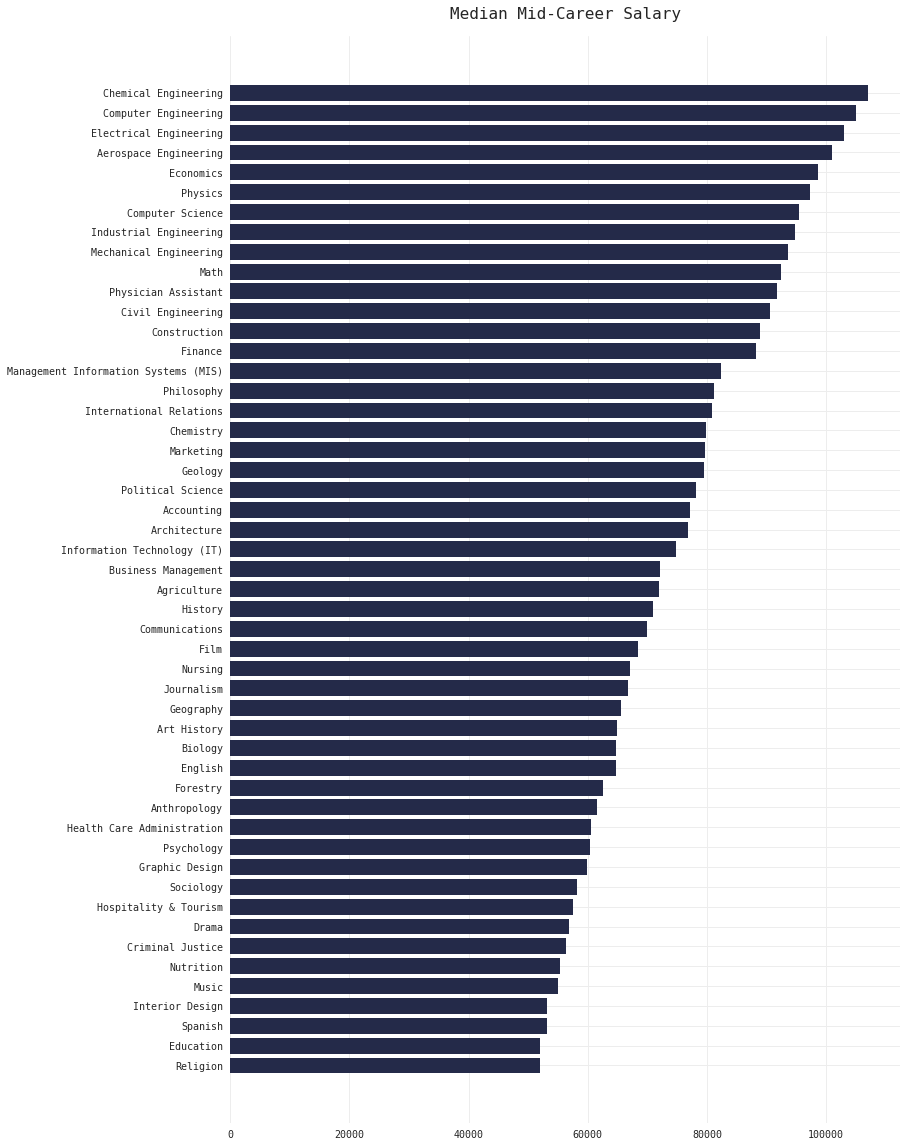

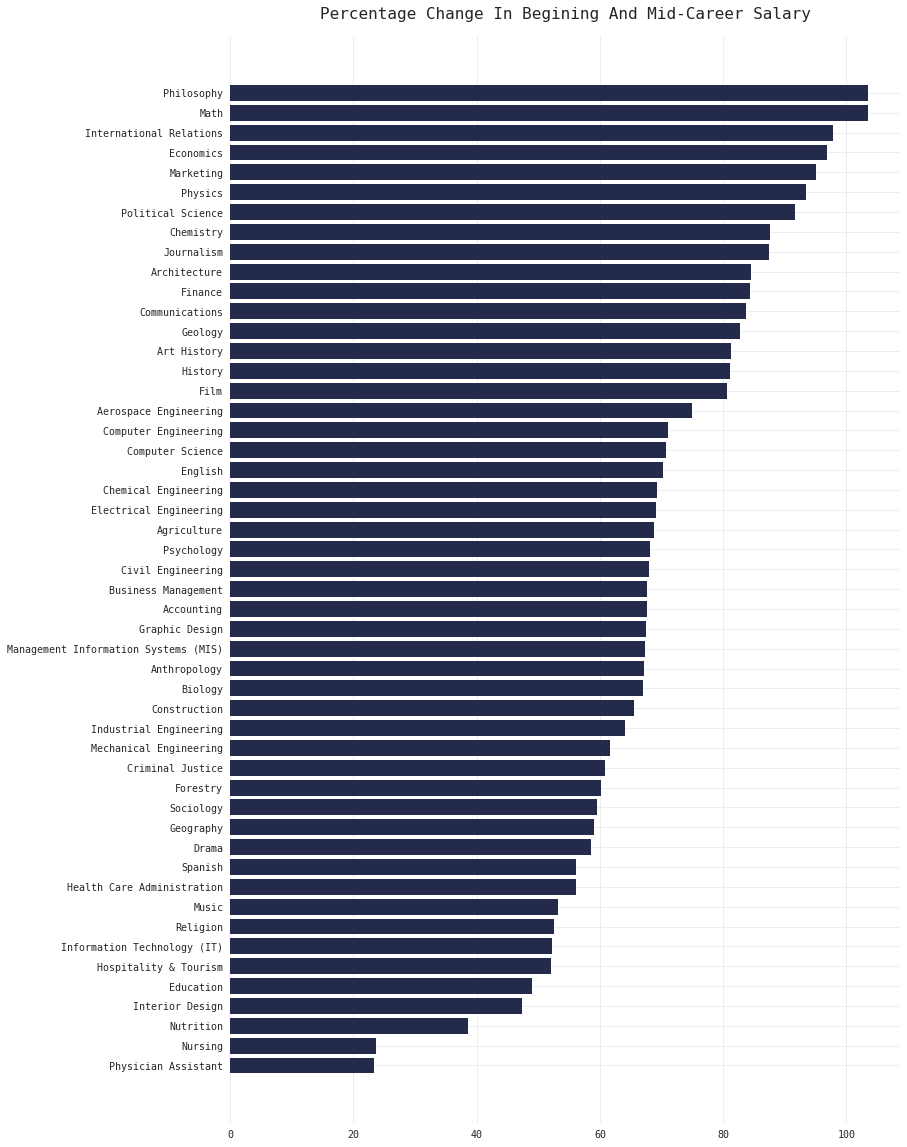

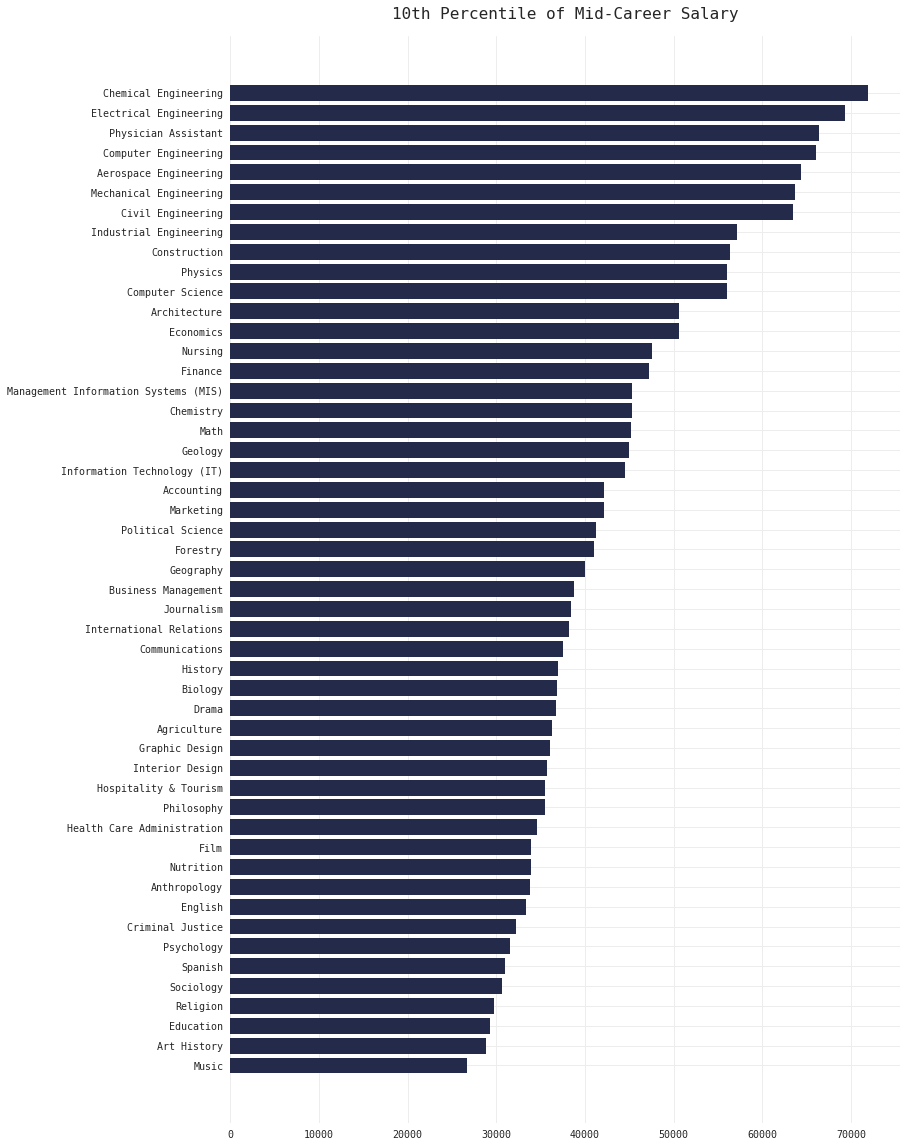

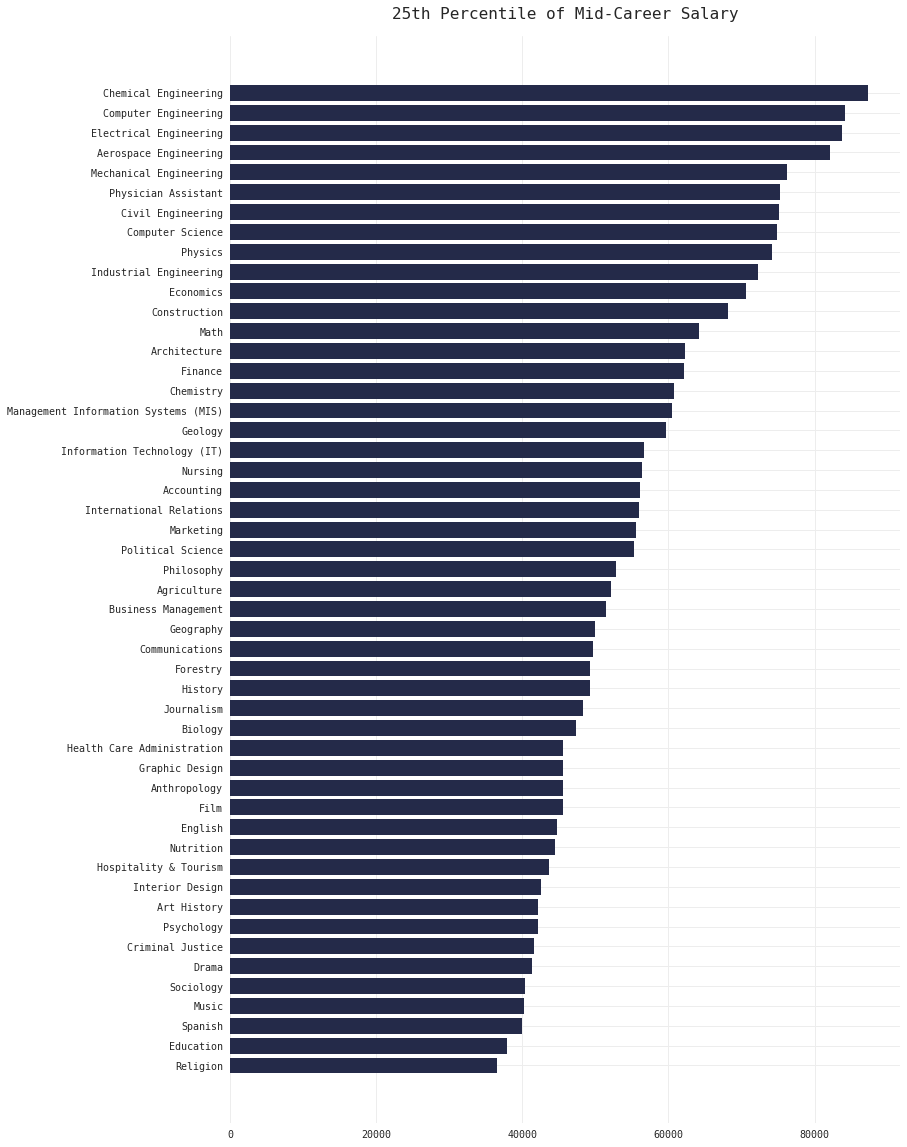

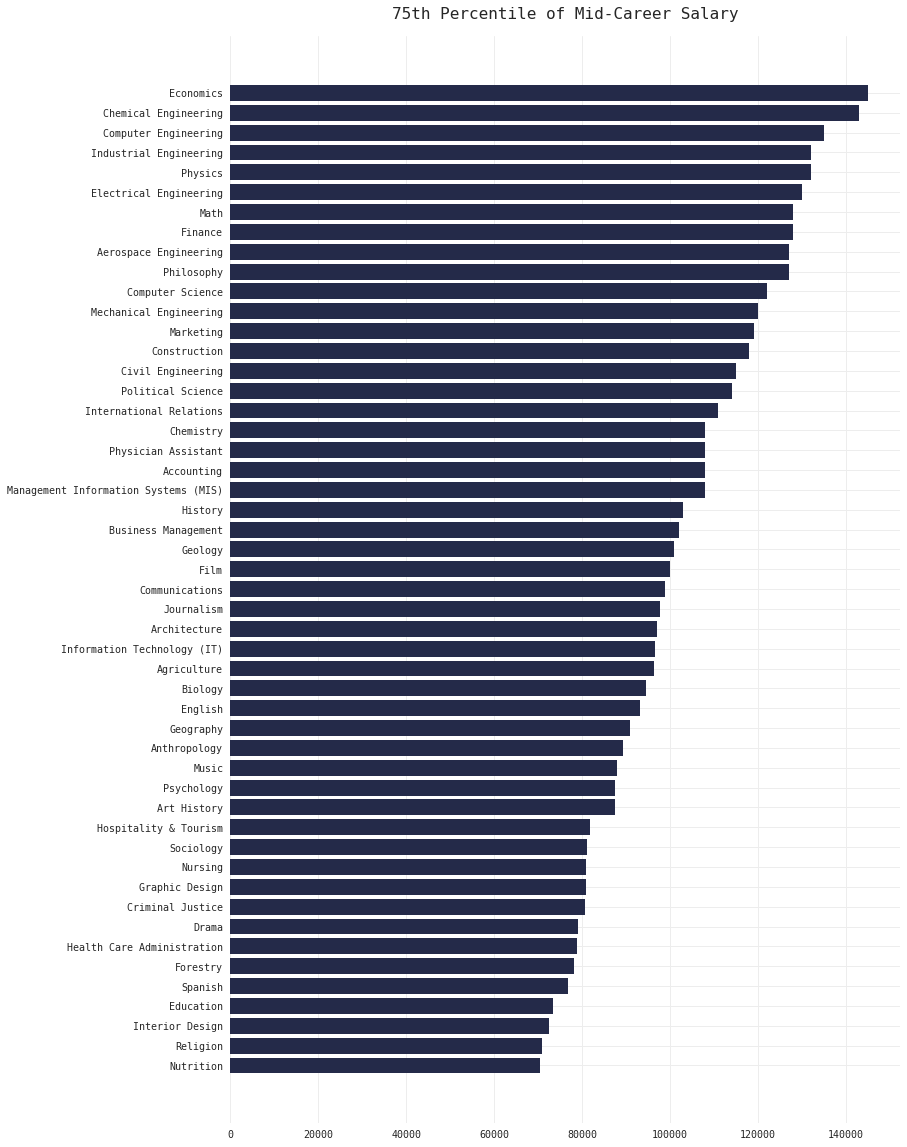

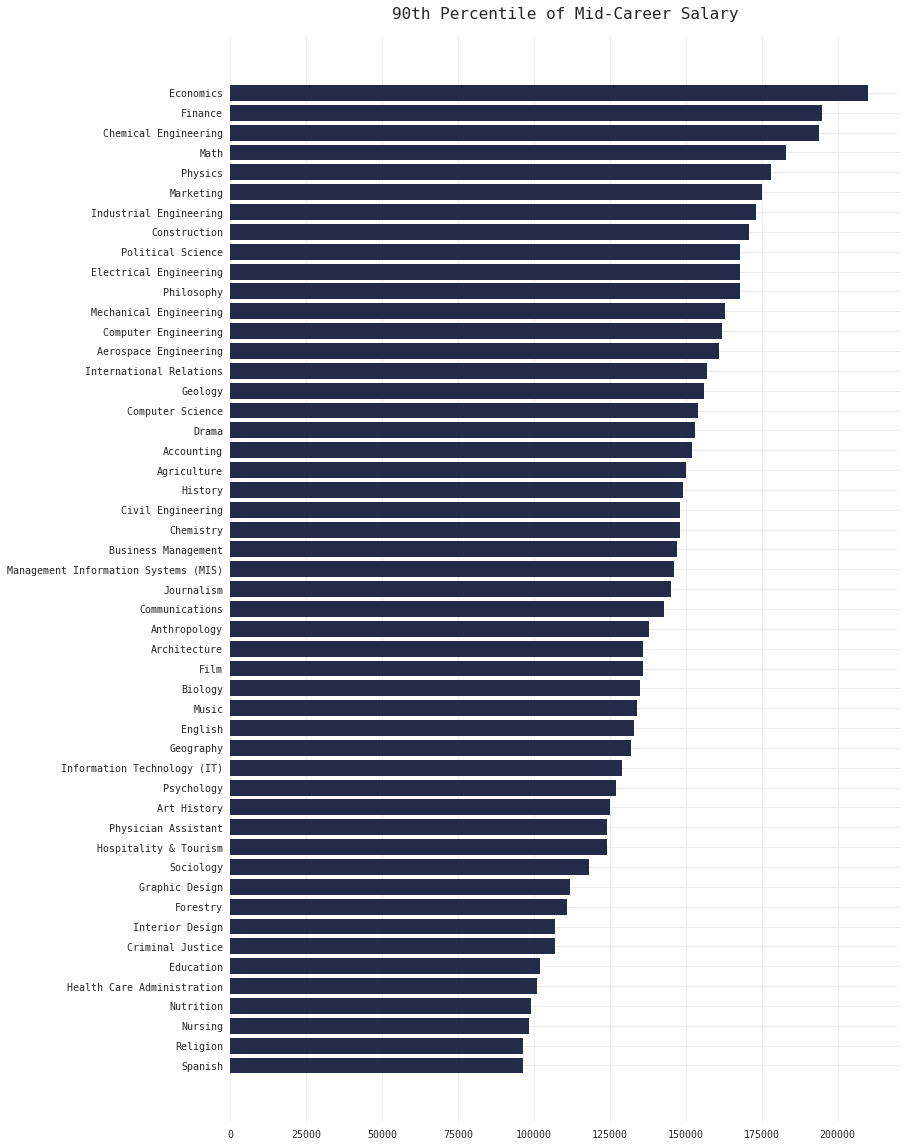

In [7]:
title_dict = {
    'Bgn50': 'Median Starting Salary',
    'Mid50': 'Median Mid-Career Salary',
    'DeltaBgnMid': 'Percentage Change In Begining And Mid-Career Salary',
    'Mid10': '10th Percentile of Mid-Career Salary',
    'Mid25': '25th Percentile of Mid-Career Salary',
    'Mid75': '75th Percentile of Mid-Career Salary',
    'Mid90': '90th Percentile of Mid-Career Salary',
}

for col in df.columns:
    temp_df = df[col].sort_values()
    plt.figure(figsize=(12, 20))
    plt.barh(range(temp_df.shape[0]), temp_df.values, color=MC)
    plt.yticks(range(temp_df.shape[0]), temp_df.index);
    plt.title(title_dict[col], y=1.01);

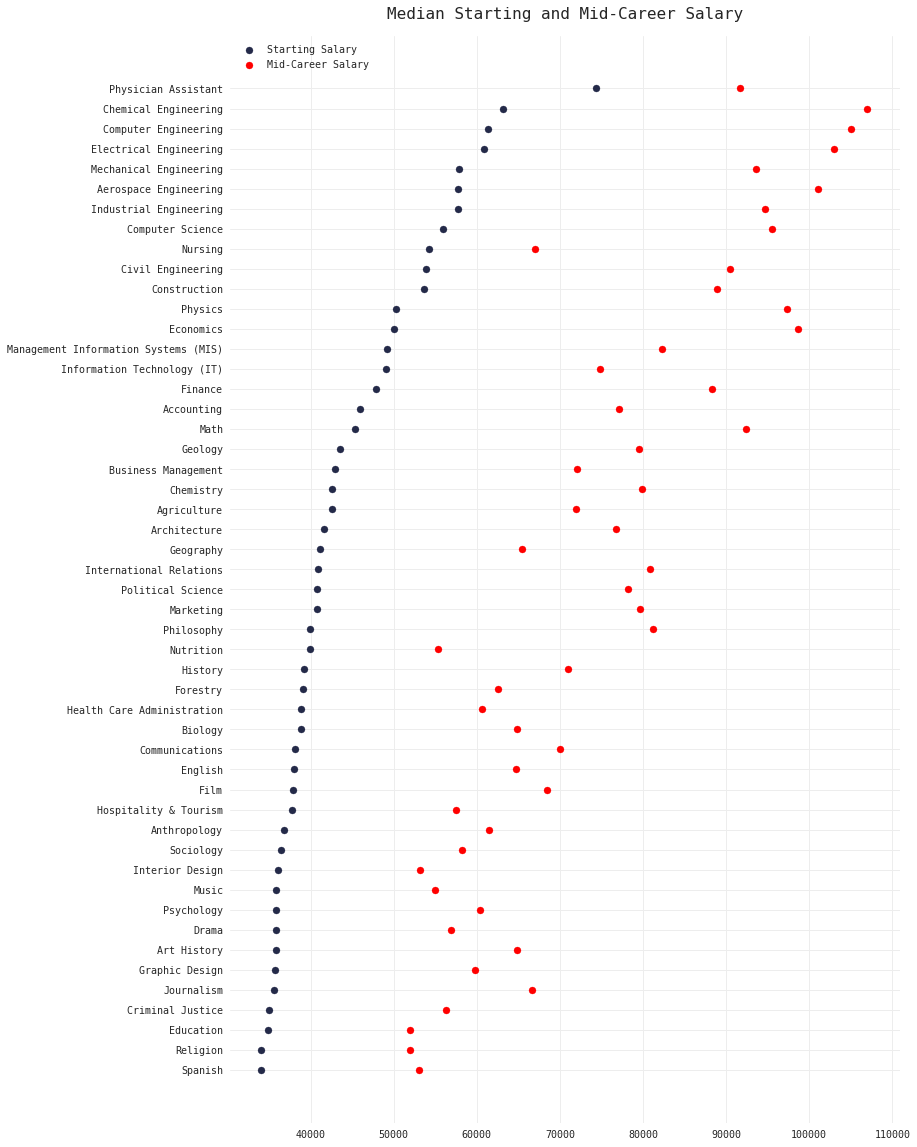

In [8]:
plt.figure(figsize=(12, 20))
plt.scatter(df['Bgn50'].values, range(df['Bgn50'].shape[0]), color=MC,
           label='Starting Salary')
plt.yticks(range(df['Bgn50'].shape[0]), df['Bgn50'].index);
# plt.legend('Starting Salary')

plt.scatter(df['Mid50'].values, range(df['Bgn50'].shape[0]), color='red',
           label='Mid-Career Salary')
plt.yticks(range(df['Mid50'].shape[0]), df['Mid50'].index);

plt.legend(loc='upper left')
plt.title('Median Starting and Mid-Career Salary', y=1.01);


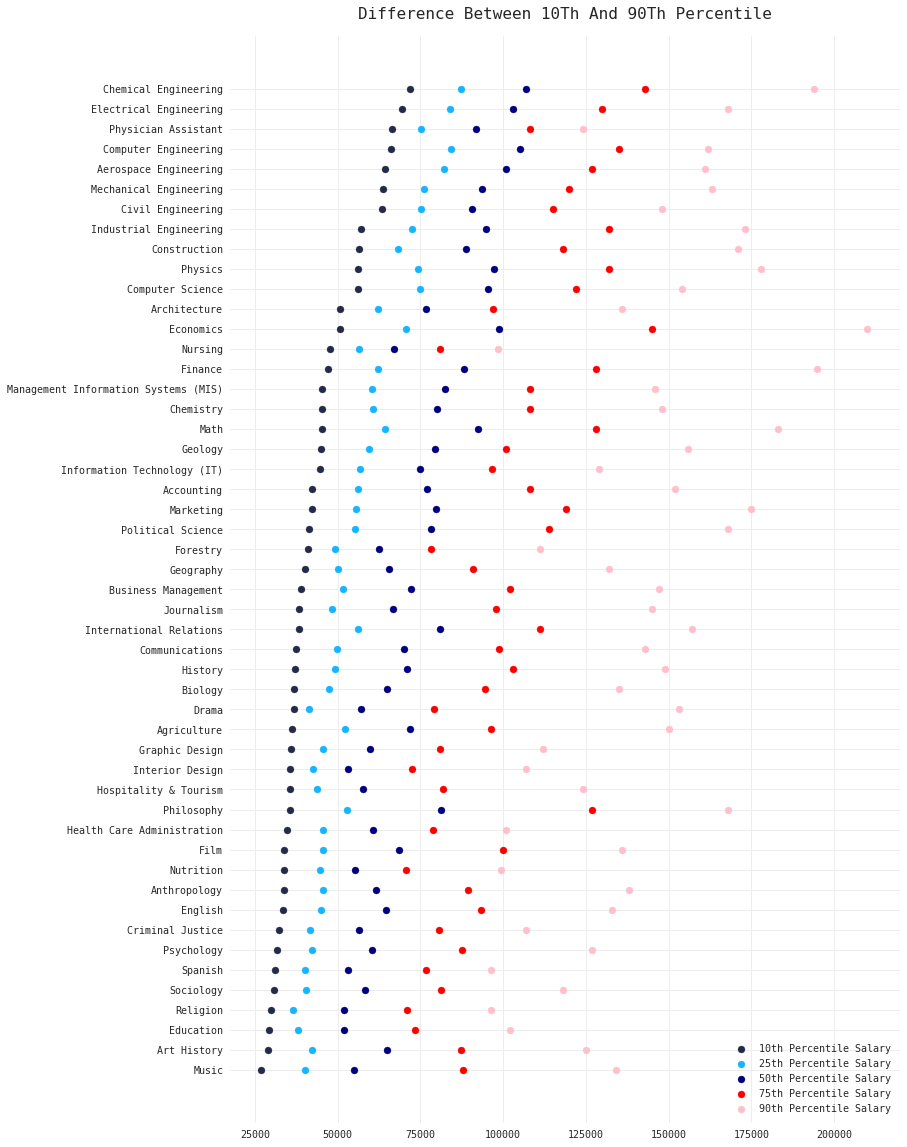

In [9]:
temp_df = df.sort_values('Mid10')

plt.figure(figsize=(12, 20))

plt.scatter(temp_df['Mid10'].values, range(temp_df['Mid10'].shape[0]), color=colors[0],
           label='10th Percentile Salary')
plt.yticks(range(temp_df['Mid90'].shape[0]), temp_df['Mid90'].index);

plt.scatter(temp_df['Mid25'].values, range(temp_df['Mid25'].shape[0]), color=colors[1],
           label='25th Percentile Salary')
plt.yticks(range(temp_df['Mid25'].shape[0]), temp_df['Mid25'].index);

plt.scatter(temp_df['Mid50'].values, range(temp_df['Mid50'].shape[0]), color=colors[2],
           label='50th Percentile Salary')
plt.yticks(range(temp_df['Mid50'].shape[0]), temp_df['Mid50'].index);

plt.scatter(temp_df['Mid75'].values, range(temp_df['Mid75'].shape[0]), color=colors[3],
           label='75th Percentile Salary')
plt.yticks(range(temp_df['Mid75'].shape[0]), temp_df['Mid75'].index);

plt.scatter(temp_df['Mid90'].values, range(temp_df['Mid90'].shape[0]), color=colors[4],
           label='90th Percentile Salary')
plt.yticks(range(temp_df['Mid90'].shape[0]), temp_df['Mid90'].index);

plt.legend()
plt.title('Difference between 10th and 90th percentile'.title(), y=1.01);

In [10]:
region_df = pd.read_csv(ZipFile('data/college-salaries.zip').open('salaries-by-region.csv'))
region_df.head(2)

,School Name,Region,Starting Median Salary,Mid-Career Median Salary,Mid-Career 10th Percentile Salary,Mid-Career 25th Percentile Salary,Mid-Career 75th Percentile Salary,Mid-Career 90th Percentile Salary
0,Stanford University,California,"$70,400.00","$129,000.00","$68,400.00","$93,100.00","$184,000.00","$257,000.00"
1,California Institute of Technology (CIT),California,"$75,500.00","$123,000.00",NaN,"$104,000.00","$161,000.00",NaN


In [11]:
region_df.shape

(320, 8)

In [12]:
region_df.columns = ['SchoolName', 'Region', 'Bgn50', 'Mid50', 'Mid10', 'Mid25', 'Mid75', 'Mid90']

for col in ['Bgn50', 'Mid50', 'Mid10', 'Mid25', 'Mid75', 'Mid90']: 
    region_df[col] = region_df[col].apply(to_float)

region_df.set_index('SchoolName', inplace=True)
region_df.sort_values('Mid50')
region_df.head(2)

,Region,Bgn50,Mid50,Mid10,Mid25,Mid75,Mid90
SchoolName,,,,,,,
Stanford University,California,"70,400.00","129,000.00","68,400.00","93,100.00","184,000.00","257,000.00"
California Institute of Technology (CIT),California,"75,500.00","123,000.00",nan,"104,000.00","161,000.00",nan


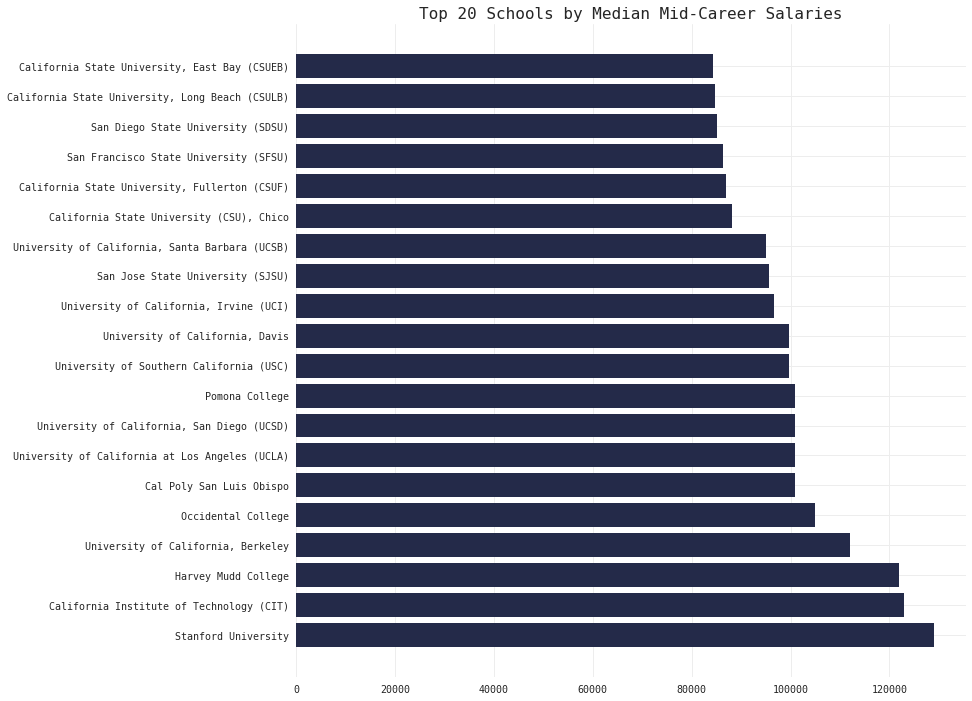

In [13]:
top_range = 20
plt.figure(figsize=(12, 12))
plt.barh( range(top_range), region_df['Mid50'][:top_range].values, color=MC)
plt.yticks(range(top_range), region_df['Mid50'][:top_range].index);
plt.title('Top 20 Schools by Median Mid-Career Salaries');

/Users/kamilwroniewicz/anaconda3/lib/python3.6/site-packages/seaborn/categorical.py:454: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


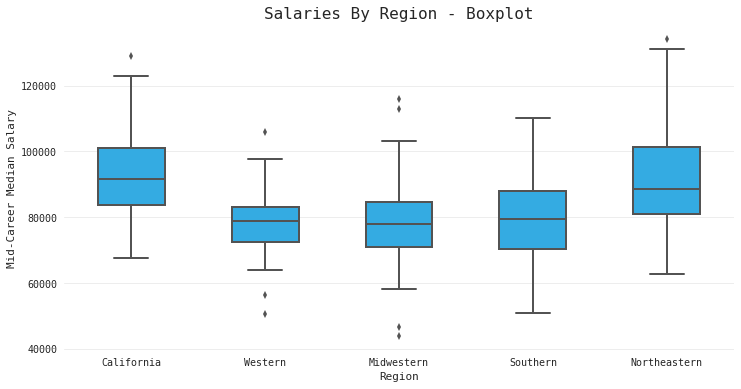

In [14]:
sns.boxplot(x=region_df.Region, y=region_df.Mid50, color=colors[1],
           linewidth=2, width=.5)
plt.title('Salaries By Region - Boxplot');
plt.ylabel('Mid-Career Median Salary');

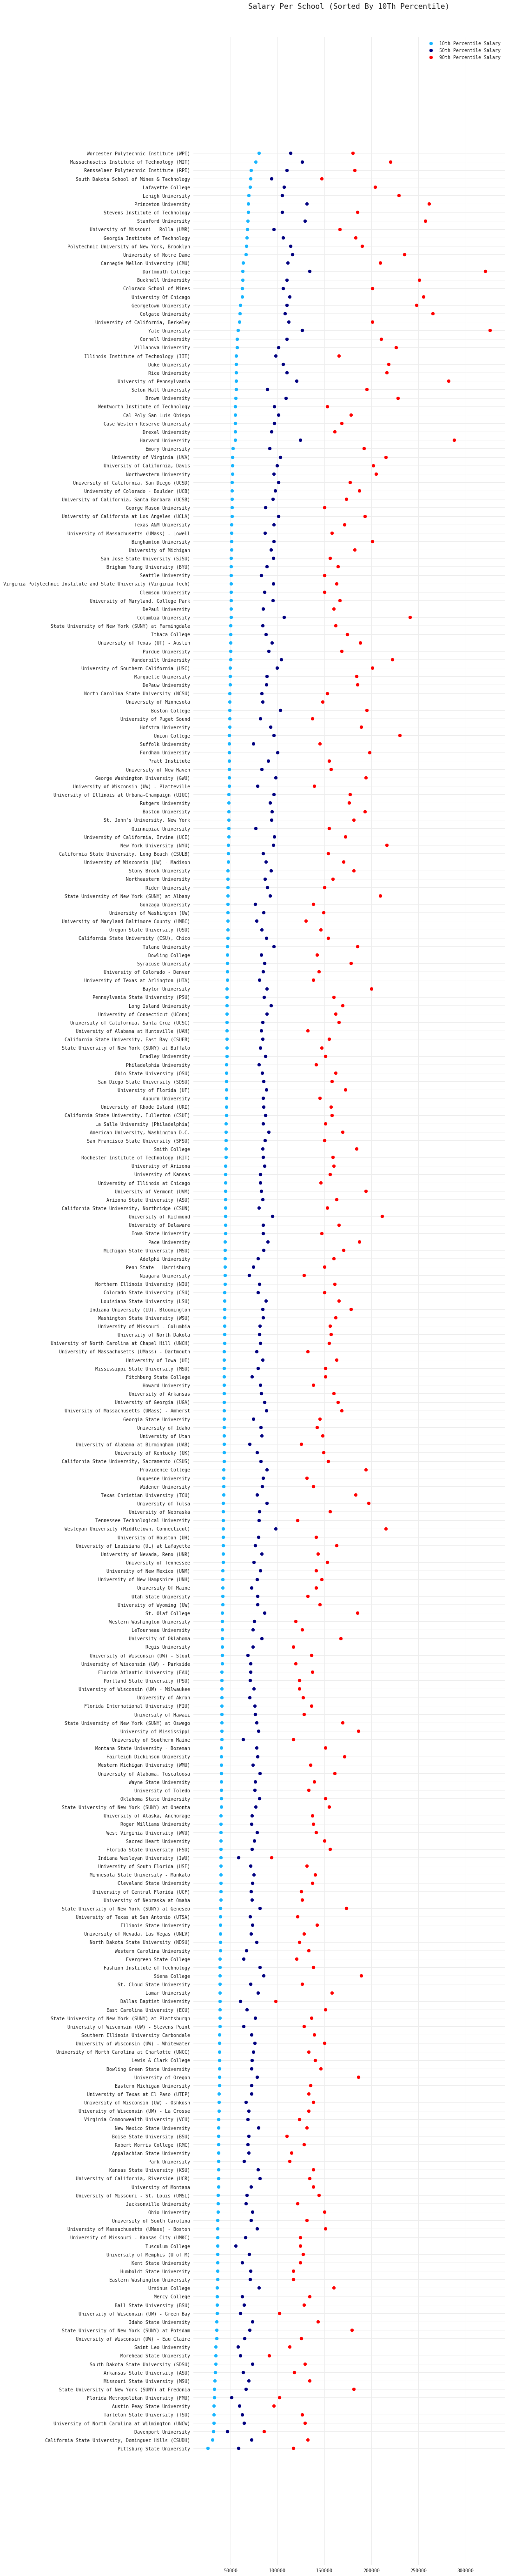

In [15]:
temp_df = region_df.sort_values('Mid10').dropna()

plt.figure(figsize=(12, 100))

plt.scatter(temp_df['Mid10'].values, range(temp_df['Mid10'].shape[0]), color=colors[1],
           label='10th Percentile Salary')
plt.yticks(range(temp_df['Mid90'].shape[0]), temp_df['Mid90'].index);


plt.scatter(temp_df['Mid50'].values, range(temp_df['Mid50'].shape[0]), color=colors[2],
           label='50th Percentile Salary')
plt.yticks(range(temp_df['Mid50'].shape[0]), temp_df['Mid50'].index);


plt.scatter(temp_df['Mid90'].values, range(temp_df['Mid90'].shape[0]), color=colors[3],
           label='90th Percentile Salary')
plt.yticks(range(temp_df['Mid90'].shape[0]), temp_df['Mid90'].index);

plt.legend()
plt.title('Salary Per School (Sorted By 10th Percentile)'.title(), y=1.01);

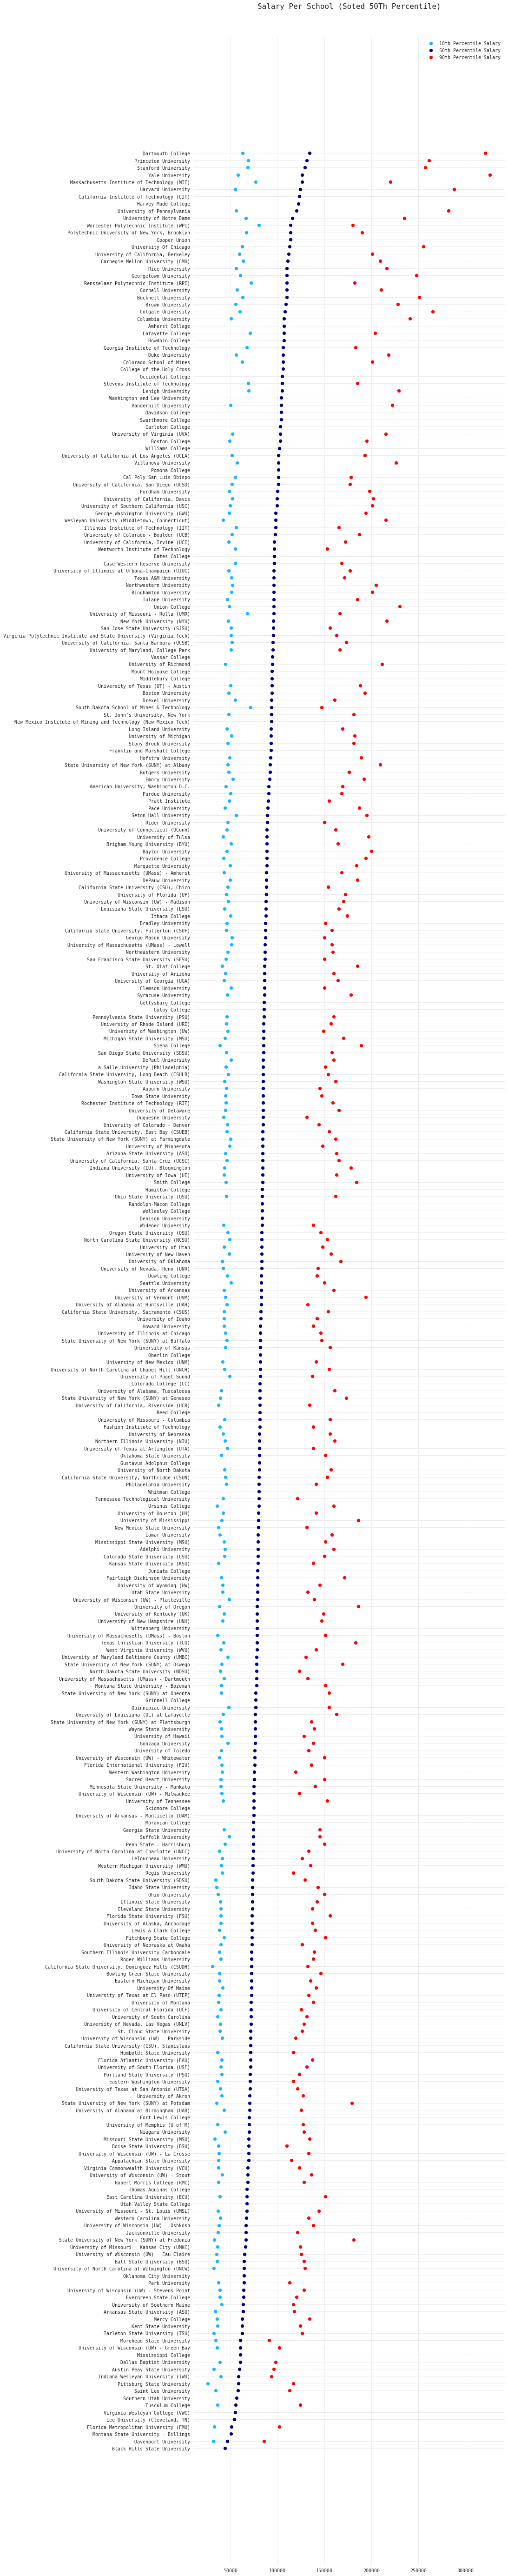

In [16]:
temp_df = region_df.sort_values('Mid50')

plt.figure(figsize=(12, 100))

plt.scatter(temp_df['Mid10'].values, range(temp_df['Mid10'].shape[0]), color=colors[1],
           label='10th Percentile Salary')
plt.yticks(range(temp_df['Mid90'].shape[0]), temp_df['Mid90'].index);


plt.scatter(temp_df['Mid50'].values, range(temp_df['Mid50'].shape[0]), color=colors[2],
           label='50th Percentile Salary')
plt.yticks(range(temp_df['Mid50'].shape[0]), temp_df['Mid50'].index);


plt.scatter(temp_df['Mid90'].values, range(temp_df['Mid90'].shape[0]), color=colors[3],
           label='90th Percentile Salary')
plt.yticks(range(temp_df['Mid90'].shape[0]), temp_df['Mid90'].index);

plt.legend()
plt.title('Salary Per School (Soted 50th Percentile)'.title(), y=1.01);

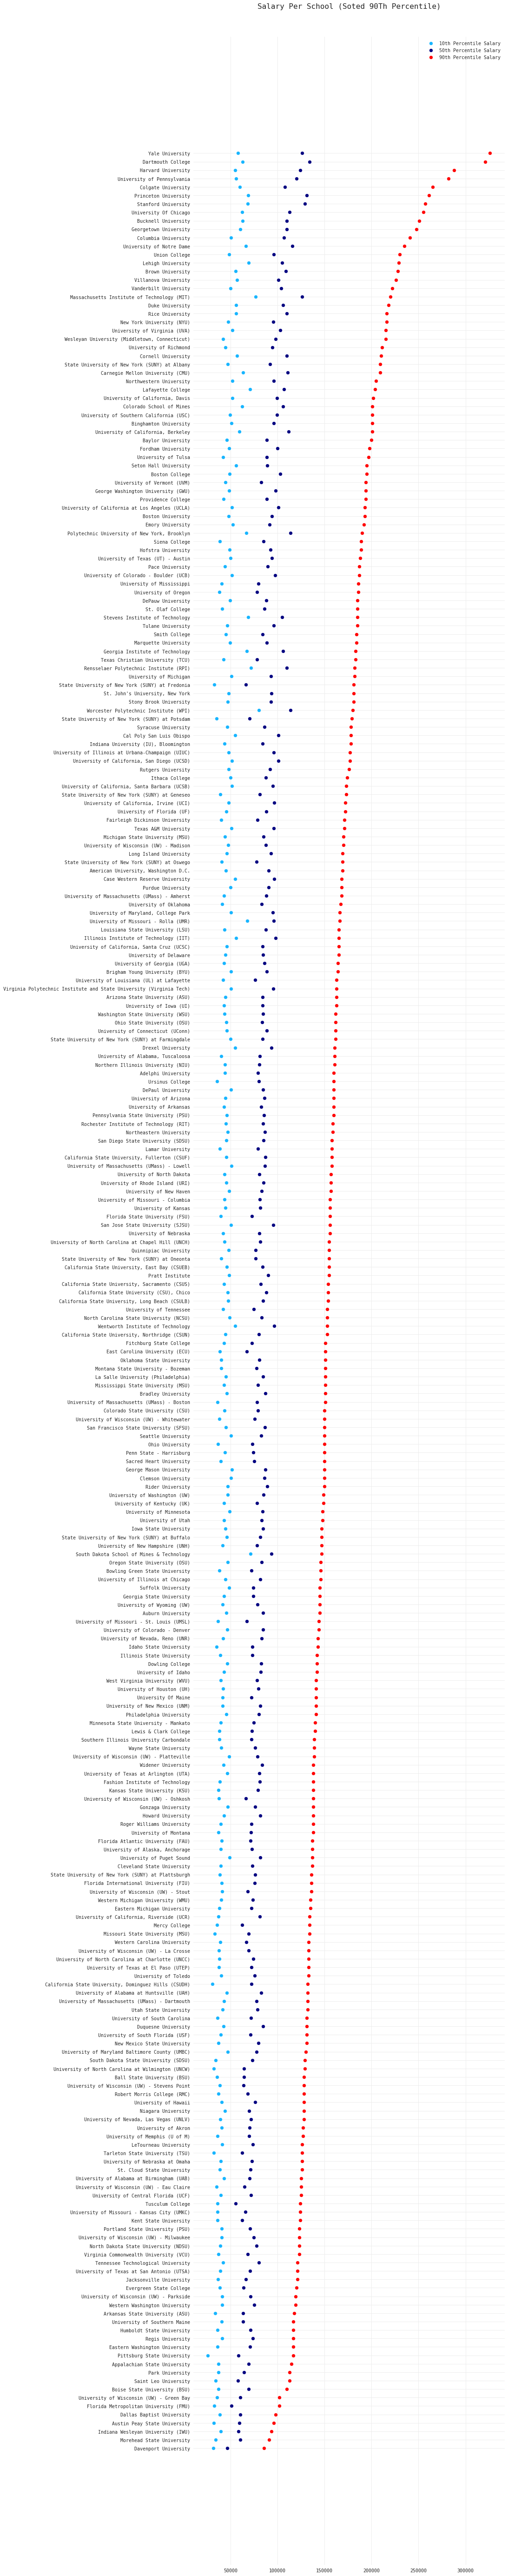

In [17]:
temp_df = region_df.sort_values('Mid90').dropna()

plt.figure(figsize=(12, 100))
plt.axes()

plt.scatter(temp_df['Mid10'].values, range(temp_df['Mid10'].shape[0]), color=colors[1],
           label='10th Percentile Salary')
plt.yticks(range(temp_df['Mid90'].shape[0]), temp_df['Mid90'].index);


plt.scatter(temp_df['Mid50'].values, range(temp_df['Mid50'].shape[0]), color=colors[2],
           label='50th Percentile Salary')
plt.yticks(range(temp_df['Mid50'].shape[0]), temp_df['Mid50'].index);


plt.scatter(temp_df['Mid90'].values, range(temp_df['Mid90'].shape[0]), color=colors[3],
           label='90th Percentile Salary')
plt.yticks(range(temp_df['Mid90'].shape[0]), temp_df['Mid90'].index);

plt.legend()
plt.title('Salary Per School (Soted 90th Percentile)'.title(), y=1.01);

In [18]:
type_df = pd.read_csv(ZipFile('data/college-salaries.zip').open('salaries-by-college-type.csv'))
type_df.head(2)

,School Name,School Type,Starting Median Salary,Mid-Career Median Salary,Mid-Career 10th Percentile Salary,Mid-Career 25th Percentile Salary,Mid-Career 75th Percentile Salary,Mid-Career 90th Percentile Salary
0,Massachusetts Institute of Technology (MIT),Engineering,"$72,200.00","$126,000.00","$76,800.00","$99,200.00","$168,000.00","$220,000.00"
1,California Institute of Technology (CIT),Engineering,"$75,500.00","$123,000.00",NaN,"$104,000.00","$161,000.00",NaN


In [19]:
type_df.columns = ['SchoolName', 'SchoolType', 'Bgn50', 'Mid50', 'Mid10', 'Mid25', 'Mid75', 'Mid90']

for col in ['Bgn50', 'Mid50', 'Mid10', 'Mid25', 'Mid75', 'Mid90']: 
    type_df[col] = type_df[col].apply(to_float)

type_df.set_index('SchoolName', inplace=True)
type_df.sort_values('Mid50')
type_df.head(2)

,SchoolType,Bgn50,Mid50,Mid10,Mid25,Mid75,Mid90
SchoolName,,,,,,,
Massachusetts Institute of Technology (MIT),Engineering,"72,200.00","126,000.00","76,800.00","99,200.00","168,000.00","220,000.00"
California Institute of Technology (CIT),Engineering,"75,500.00","123,000.00",nan,"104,000.00","161,000.00",nan


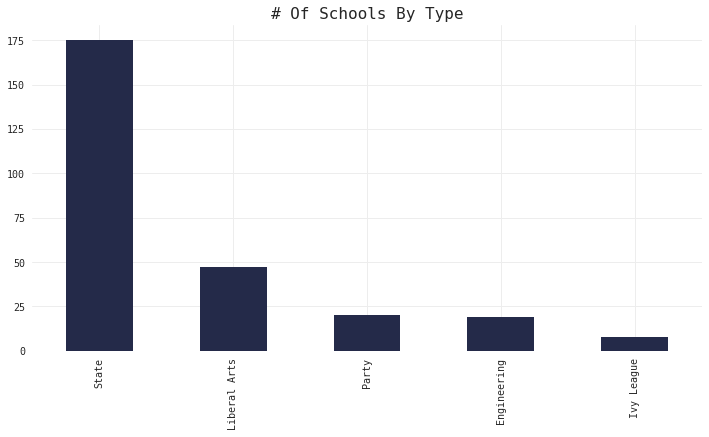

In [27]:
type_df.SchoolType.value_counts().plot(kind='bar', color=MC)
plt.title('# Of Schools By Type');

/Users/kamilwroniewicz/anaconda3/lib/python3.6/site-packages/seaborn/categorical.py:454: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


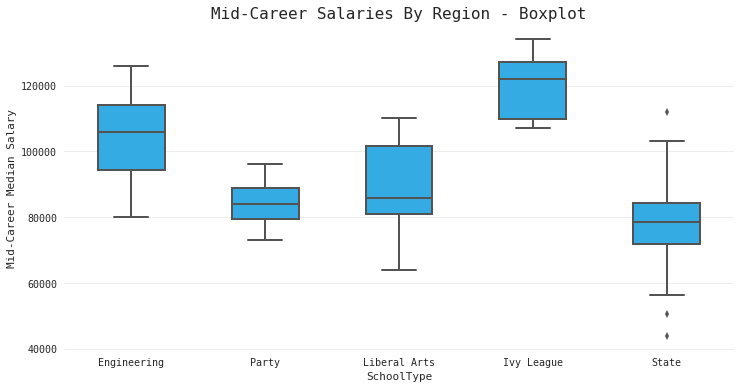

In [58]:
sns.boxplot(x=type_df.SchoolType, y=type_df.Mid50, color=colors[1],
           linewidth=2, width=.5)
plt.title('Mid-Career Salaries By Region - Boxplot');
plt.ylabel('Mid-Career Median Salary');

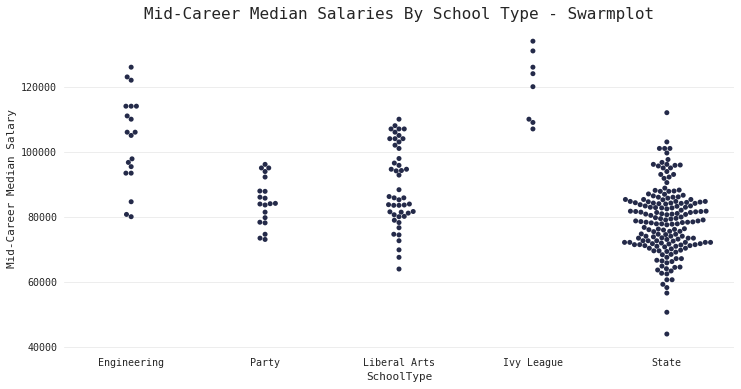

In [63]:
sns.swarmplot(x=type_df.SchoolType, y=type_df.Mid50, color=MC)
plt.title('Mid-Career Median Salaries By School Type - Swarmplot');
plt.ylabel('Mid-Career Median Salary');

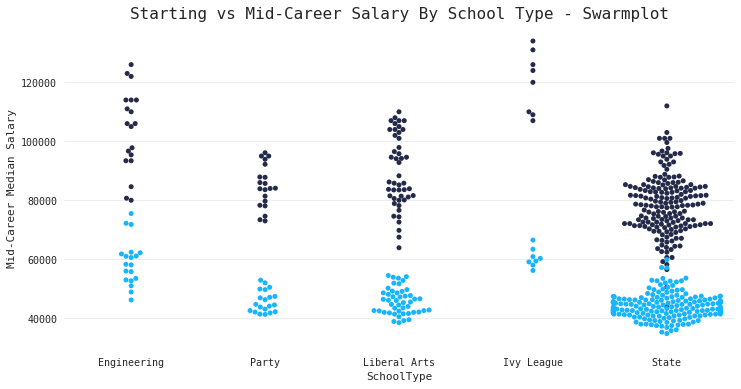

In [64]:
sns.swarmplot(x=type_df.SchoolType, y=type_df.Mid50, color=MC)
sns.swarmplot(x=type_df.SchoolType, y=type_df.Bgn50, color=colors[1])
# sns.swarmplot(x=type_df.SchoolType, y=type_df.Mid10, color=colors[1])
plt.title('Starting vs Mid-Career Salary By School Type - Swarmplot');
plt.ylabel('Mid-Career Median Salary');

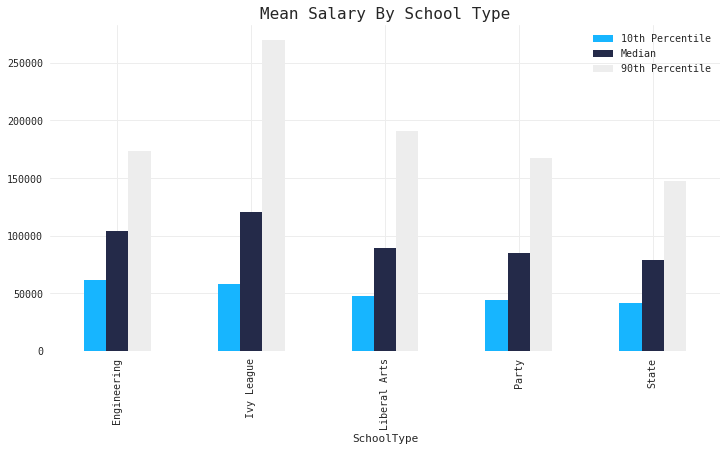

In [70]:
type_colors = [colors[1], MC, SC]
type_df.groupby('SchoolType')[['Mid10', 'Mid50', 'Mid90']].mean().plot(kind='bar', color=type_colors);
plt.title('Mean Salary By School Type');
plt.legend('10th Percentile/Median/90th Percentile'.split('/'));